In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [50]:
import json
import os
import re

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
file_path = f"{ os.getcwd() }/output/"
file_folder = "05.prepoc_knn/"
file_folder_postproc = "06.final/"
file_name = "05.preproc"
file_name_knn = "05.preproc_knn"
file_name_postproc = "06.kmeans.csv"

In [52]:
random_seed = 66

In [53]:
df_user = pd.read_csv(
    file_path + file_folder + "/" + file_name + ".csv", low_memory=False
)[["user.id_str", "full_text"]]

In [54]:
df_pca = pd.read_csv(file_path + file_folder_postproc + "/06.pca.csv", low_memory=False)
# df = pd.read_parquet(file_path + file_folder + "/" + file_name_knn + ".parquet")

In [55]:
df_knn = pd.read_csv(
    file_path + file_folder_postproc + "/06.kmeans.csv.csv", low_memory=False
)

In [56]:
print(f"users: {df_user.shape[0]}, knn: {df_knn.shape[0]}, pca: {df_pca.shape[0]}")

users: 78859, knn: 78859, pca: 78856


In [57]:
df_knn["user_id"] = df_user["user.id_str"]
df_knn["full_text"] = df_user["full_text"]
df_knn.head()

k2_label  k8_label                 user_id  \
0         0         0  1.0000688460306473e+18   
1         0         3  1.0004787620420936e+18   
2         0         3   1.001118835016192e+18   
3         0         3  1.0014295370314097e+18   
4         0         3  1.0016117119992463e+18   

                                           full_text  
0  ['bromelisa', 'curioso', 'ciro', 'gomes', 'sab...  
1  ['supermarcio1', 'olhem', 'nesse', 'vídeo', 'f...  
2  ['kimpaim', 'tai', 'forma', 'q', 'faz', 'negóc...  
3  ['tesoureiros', 'bem', 'custa', 'tentar', 'sob...  
4  ['dá', 'pra', 'adulto', 'financeiramente', 'in...

In [58]:
# df_knn[(df_knn['user_id'].map(lambda x: isinstance(x, float)) == False)]
df_knn = df_knn[df_knn["user_id"] != "False"]

In [59]:
df_knn["user_id"] = df_knn["user_id"].astype(float)

In [60]:
df_pca = pd.merge(
    left=df_pca, right=df_knn, how="left", left_on="user_id", right_on="user_id"
)
df_pca.head()

PCA_1     PCA_2     PCA_3     PCA_4       user_id  k2_label  k8_label  \
0  3.282642  0.768869 -0.022443 -0.993685  1.000069e+18       NaN       NaN   
1 -1.530911  0.256849  0.002600  0.114886  1.000479e+18       0.0       3.0   
2 -1.519970 -0.650976 -0.028492  0.348947  1.001119e+18       0.0       3.0   
3 -1.824125  0.038848 -0.004451  0.200283  1.001430e+18       0.0       3.0   
4 -2.177256  0.042008 -0.000469  0.033148  1.001612e+18       0.0       3.0   

                                           full_text  
0                                                NaN  
1  ['supermarcio1', 'olhem', 'nesse', 'vídeo', 'f...  
2  ['kimpaim', 'tai', 'forma', 'q', 'faz', 'negóc...  
3  ['tesoureiros', 'bem', 'custa', 'tentar', 'sob...  
4  ['dá', 'pra', 'adulto', 'financeiramente', 'in...

In [61]:
del df_user
del df_knn

In [62]:
df_pca.k2_label.value_counts()

0.0    69198
1.0     2243
Name: k2_label, dtype: int64

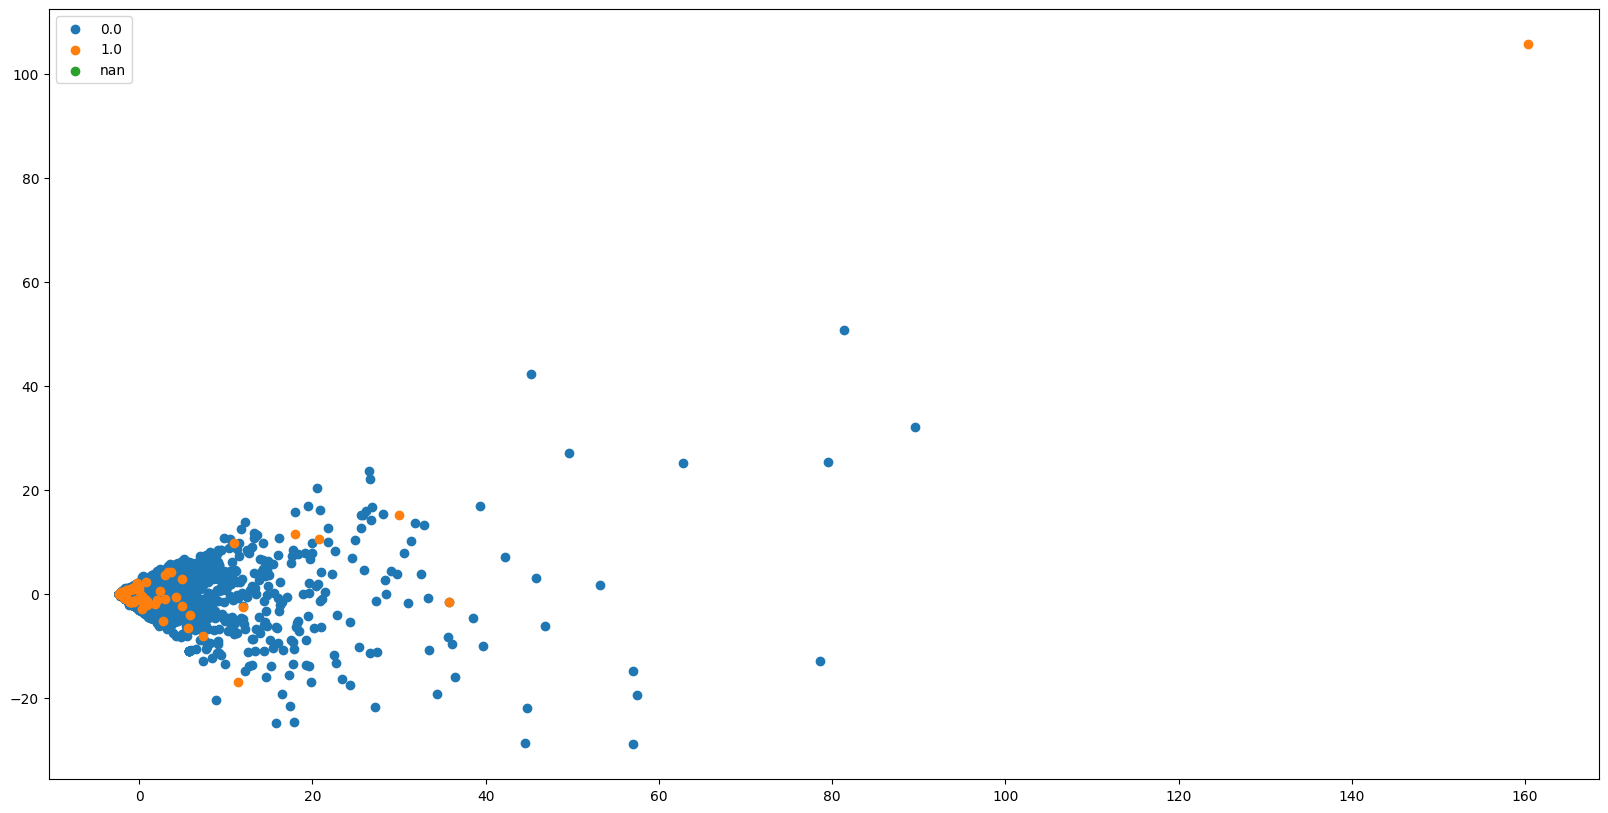

In [63]:
# Getting unique labels
u_labels = np.unique(df_pca["k2_label"])

# plotting the results:
plt.figure(figsize=(20, 10))
for i in u_labels:
    plt.scatter(
        df_pca[df_pca.k8_label == i].PCA_1, df_pca[df_pca.k8_label == i].PCA_2, label=i
    )
plt.legend()
plt.show()

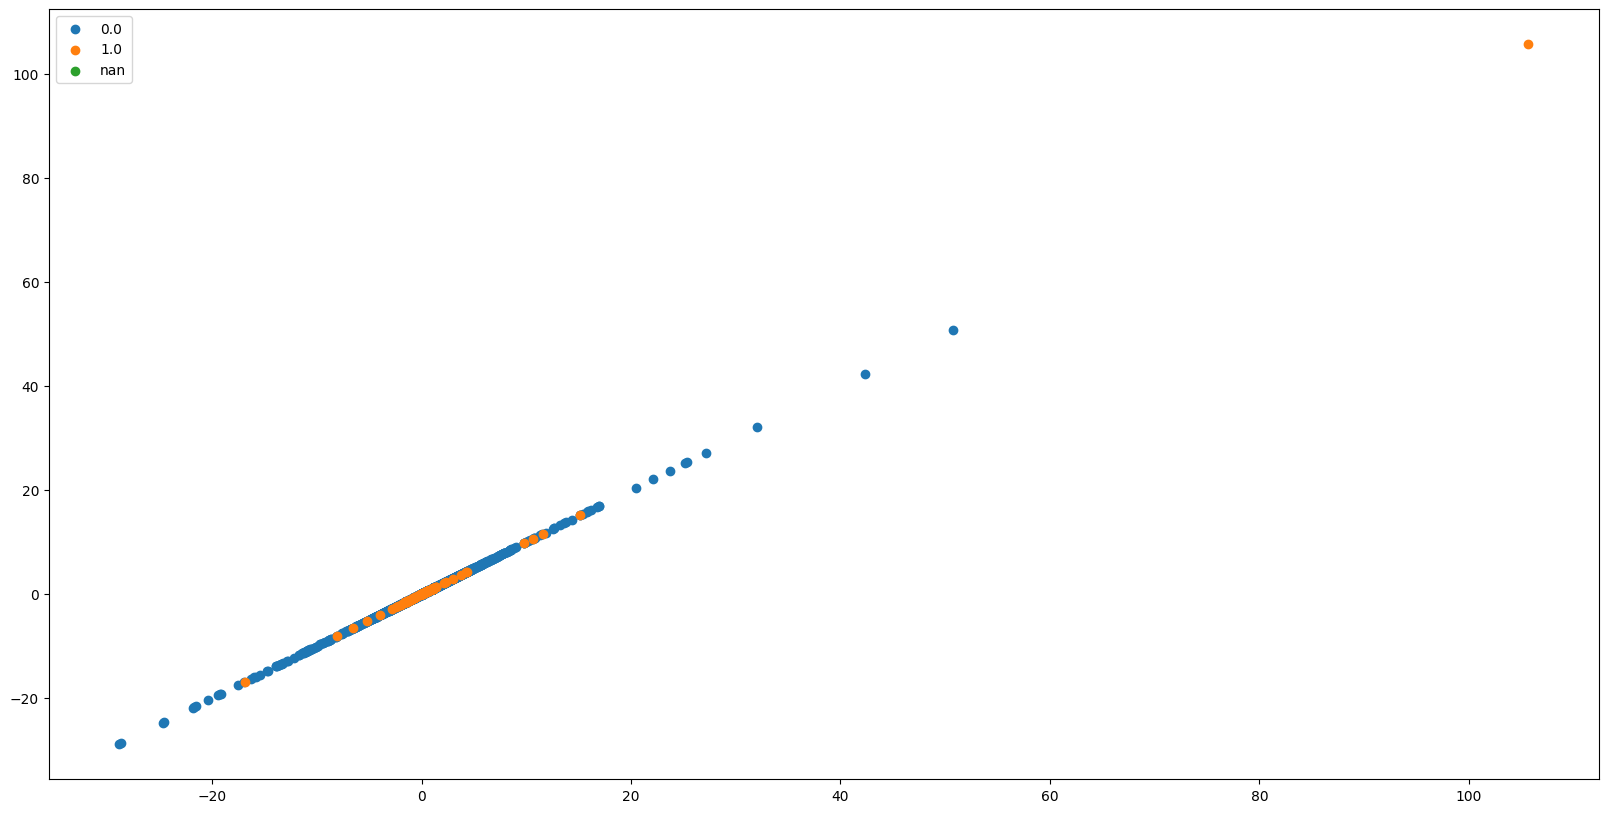

In [64]:
# Getting unique labels
u_labels = np.unique(df_pca["k2_label"])

# plotting the results:
plt.figure(figsize=(20, 10))
for i in u_labels:
    plt.scatter(
        df_pca[df_pca.k8_label == i].PCA_2, df_pca[df_pca.k8_label == i].PCA_2, label=i
    )
plt.legend()
plt.show()

In [65]:
df_pca.k8_label.value_counts()

3.0    60718
0.0     6515
2.0     1802
7.0     1379
6.0      780
1.0      124
4.0      122
5.0        1
Name: k8_label, dtype: int64

In [89]:
df_pca[df_pca.k8_label == 5]

PCA_1     PCA_2     PCA_3     PCA_4       user_id  k2_label  \
13869  0.63297  2.201137  0.014159 -1.332892  1.189274e+18       1.0   

       k8_label                                          full_text  
13869       5.0  ['lulaoficial', 'presidente', 'lula', 'urgimos...

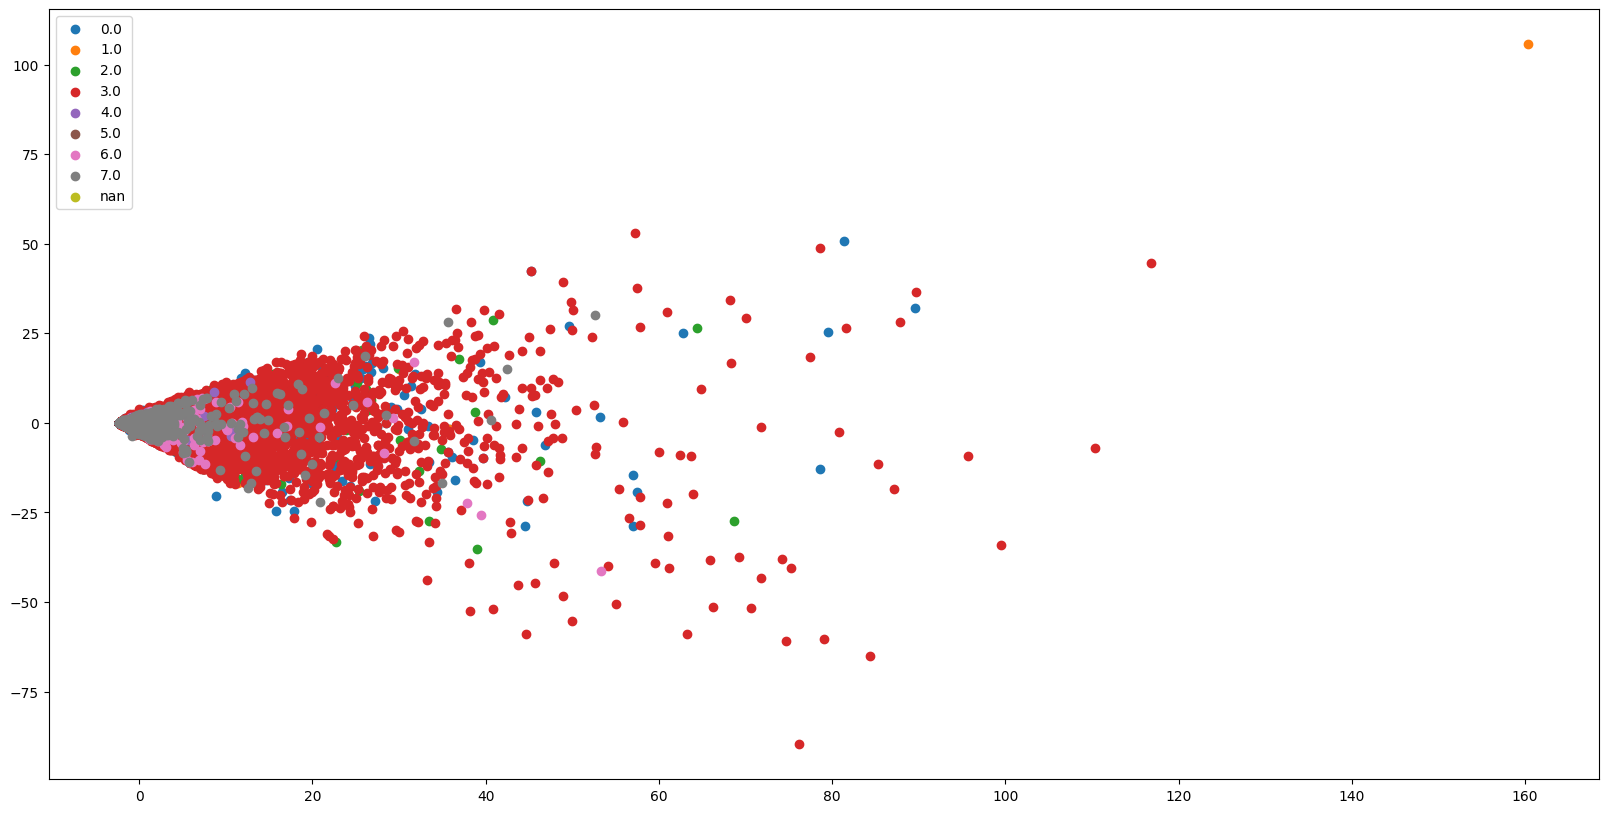

In [66]:
# Getting unique labels
u_labels = np.unique(df_pca["k8_label"])

# plotting the results:
plt.figure(figsize=(20, 10))
for i in u_labels:
    plt.scatter(
        df_pca[df_pca.k8_label == i].PCA_1, df_pca[df_pca.k8_label == i].PCA_2, label=i
    )
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


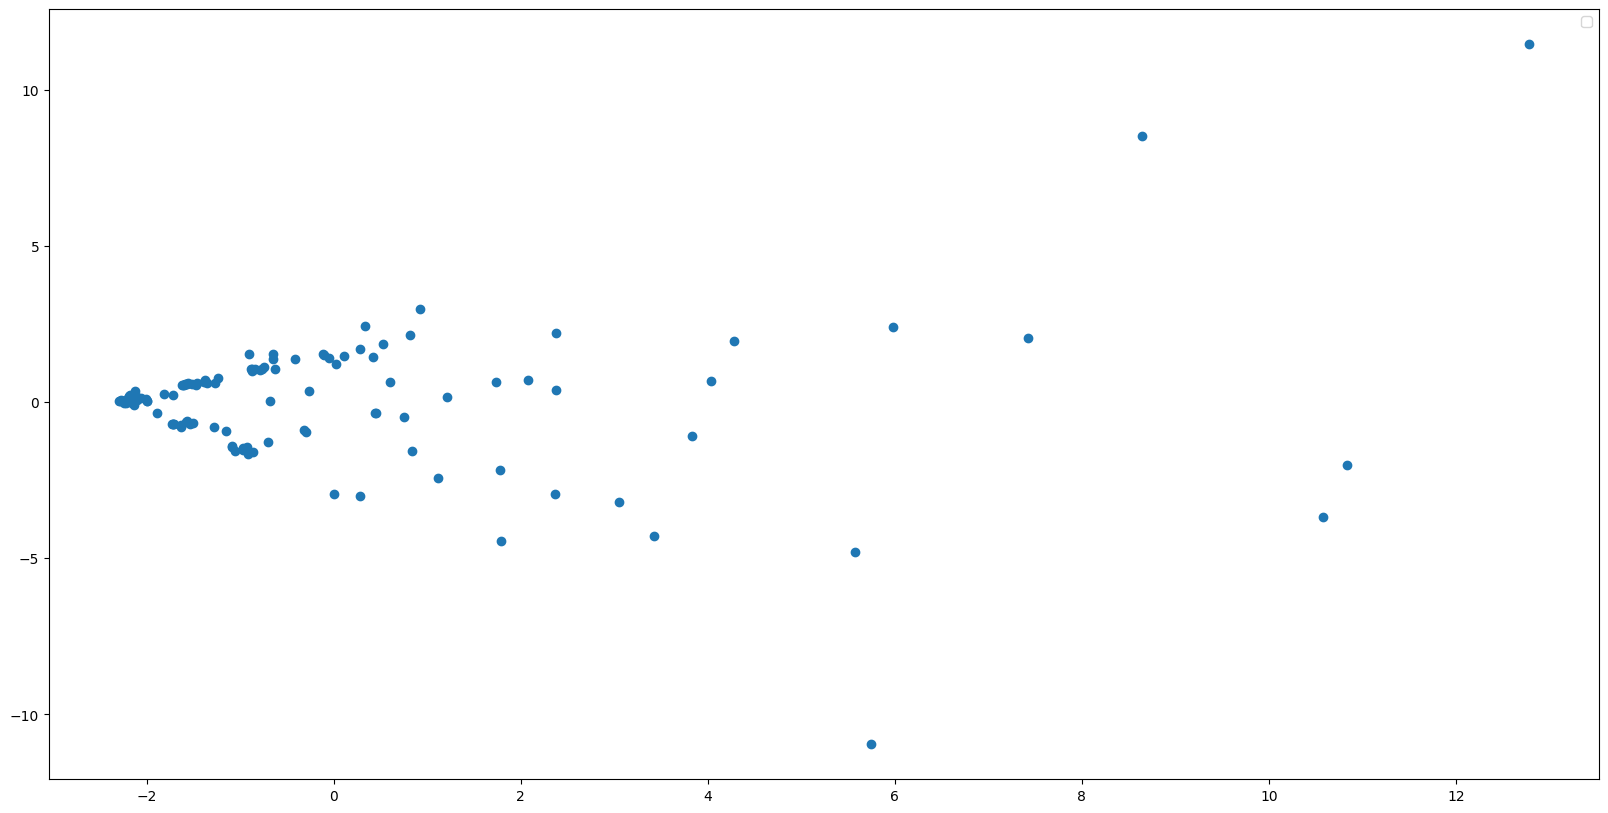

In [67]:
# Getting unique labels
u_labels = np.unique(df_pca["k8_label"])

i = 4
# plotting the results:
plt.figure(figsize=(20, 10))
plt.scatter(
    df_pca[df_pca.k8_label == i].PCA_1, df_pca[df_pca.k8_label == i].PCA_2
)  # , label = i)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


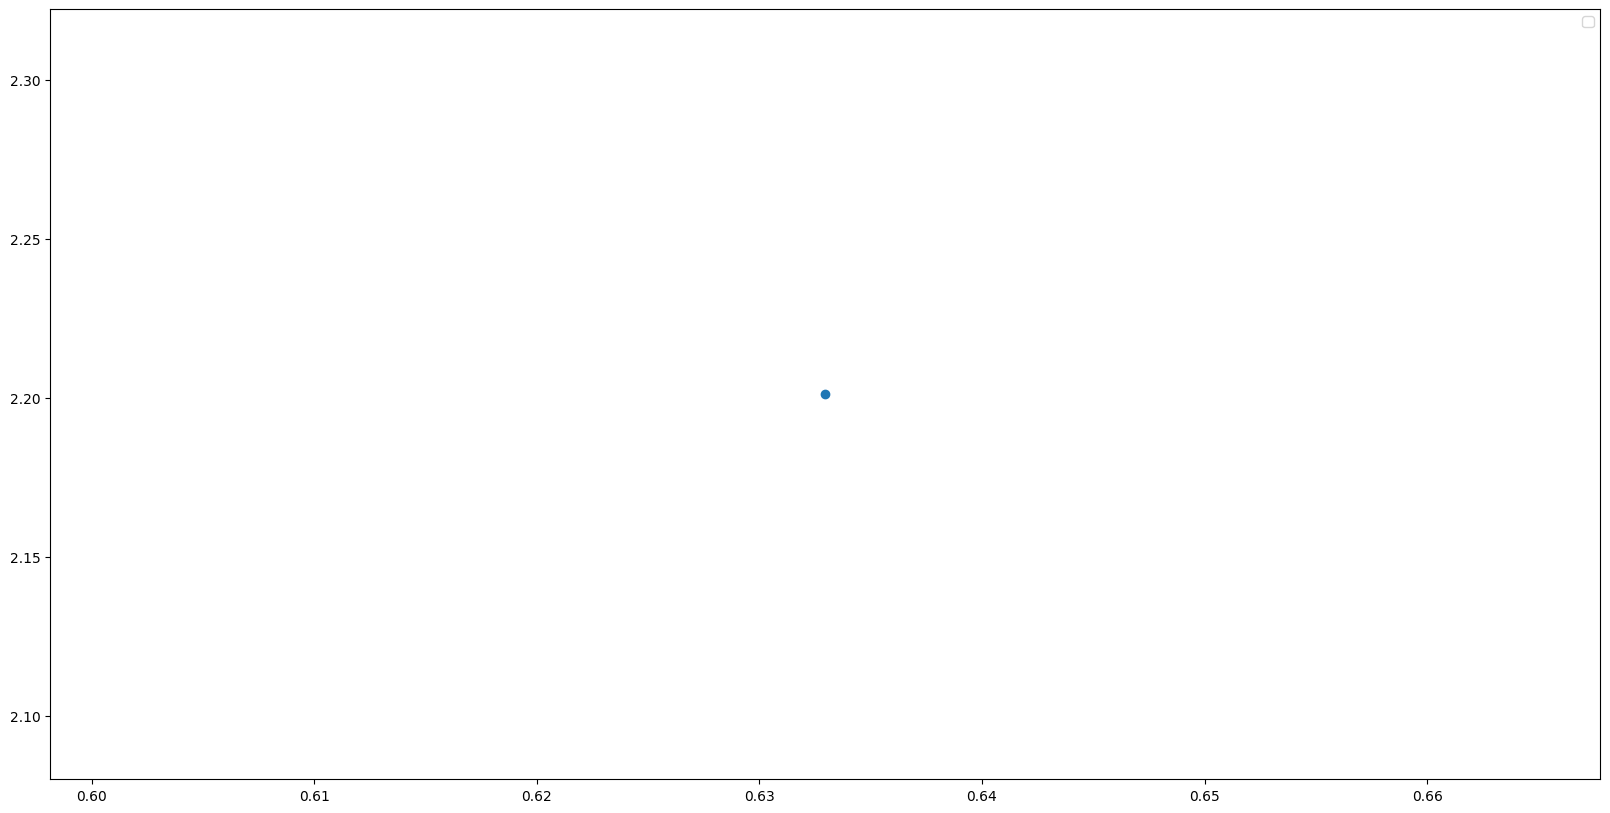

In [68]:
# Getting unique labels
u_labels = np.unique(df_pca["k8_label"])

i = 5
# plotting the results:
plt.figure(figsize=(20, 10))
plt.scatter(
    df_pca[df_pca.k8_label == i].PCA_1, df_pca[df_pca.k8_label == i].PCA_2
)  # , label = i)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


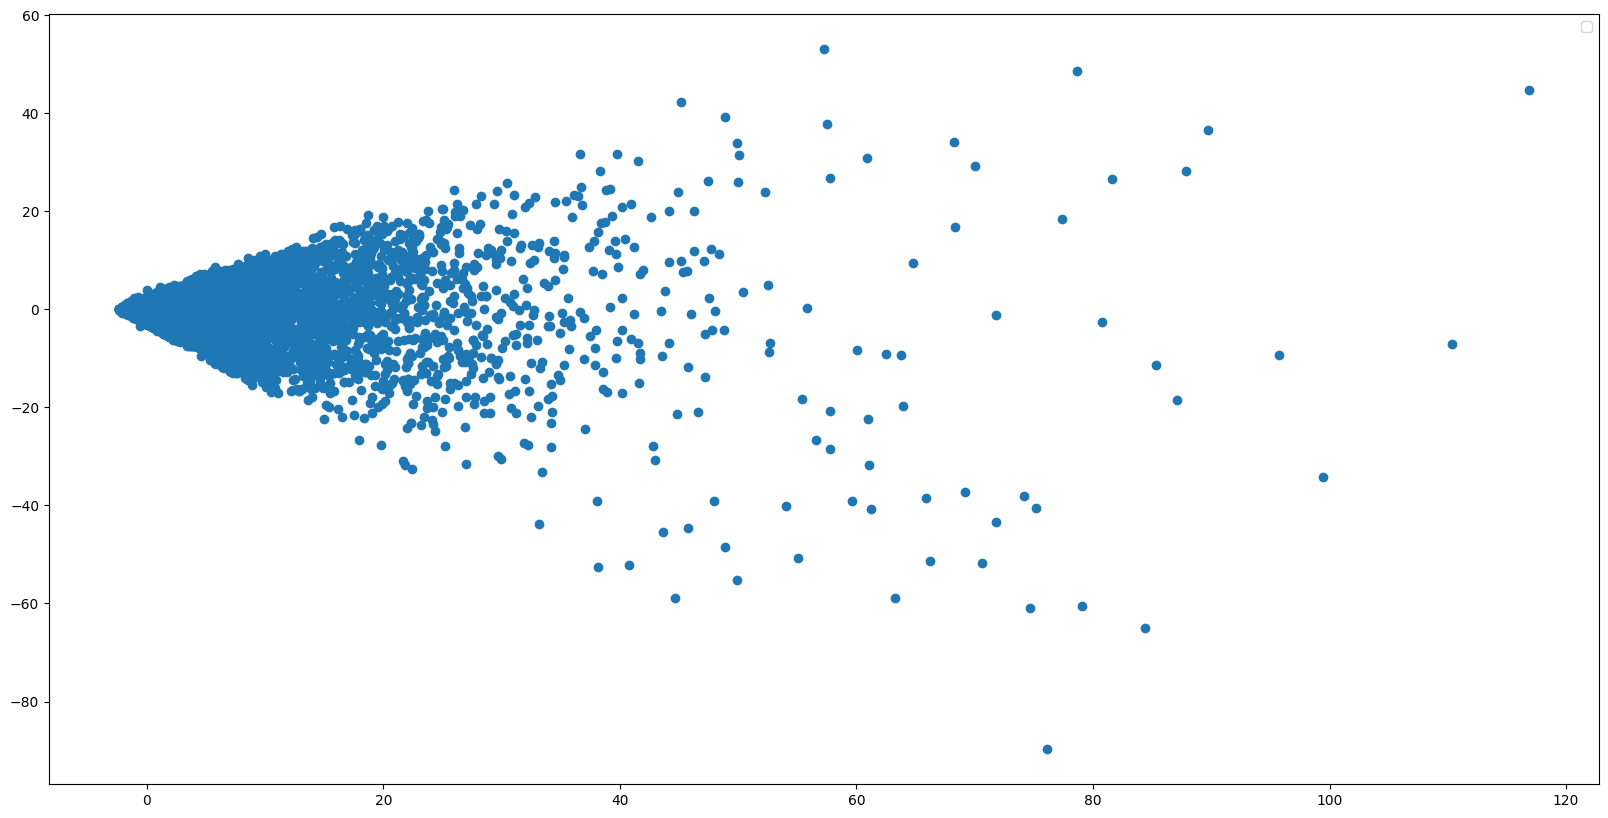

In [ ]:
# Getting unique labels
u_labels = np.unique(df_pca["k8_label"])

i = 3
# plotting the results:
plt.figure(figsize=(20, 10))
plt.scatter(
    df_pca[df_pca.k8_label == i].PCA_1, df_pca[df_pca.k8_label == i].PCA_2
)  # , label = i)
plt.legend()
plt.show()

In [ ]:
def top_palabras(df, prefix):
    aux = pd.Series(
        " ".join(df["full_text"].astype(str)).lower().split()
    ).value_counts()[:25]
    aux = aux.reset_index()
    aux.columns = [f"{prefix}_palabra", f"{prefix}_frec"]
    return aux

In [73]:
df_top = pd.concat(
    [
        top_palabras(df_pca[df_pca.k2_label == 0], "k2_0"),
        top_palabras(df_pca[df_pca.k2_label == 1], "k2_1"),
        top_palabras(df_pca[df_pca.k8_label == 0], "k8_0"),
        top_palabras(df_pca[df_pca.k8_label == 1], "k8_1"),
        top_palabras(df_pca[df_pca.k8_label == 2], "k8_2"),
        top_palabras(df_pca[df_pca.k8_label == 3], "k8_3"),
        top_palabras(df_pca[df_pca.k8_label == 4], "k8_4"),
        top_palabras(df_pca[df_pca.k8_label == 5], "k8_5"),
        top_palabras(df_pca[df_pca.k8_label == 6], "k8_6"),
        top_palabras(df_pca[df_pca.k8_label == 7], "k8_7"),
    ], axis=1
)
df_top.head(5)

k2_0_palabra  k2_0_frec   k2_1_palabra  k2_1_frec   k8_0_palabra  \
0   'bolsonaro',      75749   'bolsonaro',      33434   'bolsonaro',   
1        'lula',      64910        'lula',      30549        'lula',   
2  'presidente',      17256  'presidente',       9221  'presidente',   
3      'brasil',      14554      'brasil',       6671         'vai',   
4         'vai',      14257         'vai',       6311      'brasil',   

   k8_0_frec   k8_1_palabra  k8_1_frec k8_2_palabra  k8_2_frec   k8_3_palabra  \
0      36507        'lula',       5886        'la',       5572   'bolsonaro',   
1      18103   'bolsonaro',       4078        'en',       2983        'lula',   
2       8988  'presidente',       1222        'el',       2579         'vai',   
3       6239      'brasil',       1087         'y',       1610  'presidente',   
4       5721         'vai',        769        'es',       1565      'brasil',   

   k8_3_frec  k8_4_palabra  k8_4_frec     k8_5_palabra  k8_5_frec  \
0      41478  'bolsomusk',       2731    'sequeirakg',        188   
1      41283  'bolsonaro',       2436   'soberaniaja',        188   
2       8467       'musk',       2295    'cmsclaudio',        188   
3       8365       'elon',       1872     'lacerdaeh',        188   
4       8177        'vai',        966  'divaolinda55',        188   

    k8_6_palabra  k8_6_frec  k8_7_palabra  k8_7_frec  
0   'bolsonaro',      16257       'lula',      20842  
1        'lula',       7005  'bolsonaro',       7675  
2  'presidente',       4623       'time',       3794  
3         'vai',       2542        'sai',       3384  
4      'brasil',       2353     'brasil',       2282

In [74]:
df_top.to_csv(file_path + file_folder_postproc + "/06.top_palabras.csv", index=False)

In [80]:

from wordcloud import STOPWORDS, WordCloud

In [84]:
def print_cloud(df, column):
    # aux = [item for lists in df[column] for item in lists]

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(" ".join(df[column]))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

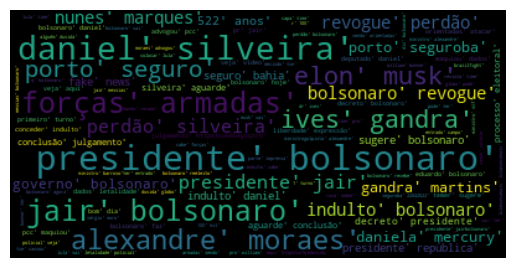

In [91]:
print_cloud(df_pca[df_pca.k8_label == 6], "full_text")